In [1]:
# Let's make a photo-z metric, or at least some code to check photo_z error
# given depths and a fiducual galaxy
import numpy as np
import os
from rubin_sim.phot_utils import Sed, Bandpass, rubin_bandpasses
from rubin_sim.data import get_data_dir
import matplotlib.pylab as plt
%matplotlib inline

In [4]:
dd = get_data_dir()
filter_dict = rubin_bandpasses()

In [5]:

gal_file = os.path.join(dd, 'seds', 'galaxySED/Exp.40E09.002Z.spec.gz')


In [6]:
sed = Sed()
sed.read_sed_flambda(gal_file)

(100.0, 800.0)

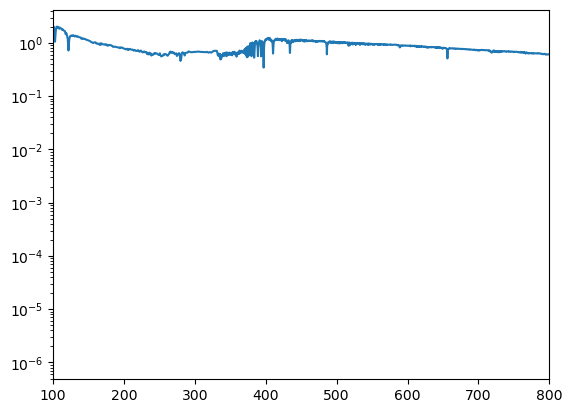

In [7]:
plt.semilogy(sed.wavelen, sed.flambda)
plt.xlim([100,800])

In [8]:
redshifts = np.arange(0,5, .02)


In [9]:
names = ['u', 'g', 'r', 'i', 'z', 'y']
types = [float]*6
mags = np.empty(redshifts.size, dtype=list(zip(names,types)))

In [10]:
for i,z in enumerate(redshifts):
    wavelen, flam = sed.redshift_sed(z, wavelen=sed.wavelen, flambda=sed.flambda)
    shifted_sed = Sed(wavelen=wavelen, flambda=flam)
    for key in filter_dict:
        mags[i][key] = shifted_sed.calc_mag(filter_dict[key])
    

In [11]:
mags

array([(-17.47496001, -18.3503391 , -18.69010712, -18.85205325, -18.92330999, -18.92034862),
       (-17.39877723, -18.35782694, -18.71238644, -18.88273097, -18.95854996, -18.96660565),
       (-17.33147562, -18.36240345, -18.73364781, -18.91138781, -18.9940828 , -19.01139044),
       (-17.29009023, -18.36283346, -18.75501737, -18.93776916, -19.02663976, -19.05409289),
       (-17.27501766, -18.35819688, -18.77447734, -18.96135078, -19.05834209, -19.09573603),
       (-17.27223222, -18.34912007, -18.79242779, -18.9858337 , -19.08956586, -19.13524212),
       (-17.2789018 , -18.33750706, -18.80867619, -19.00944232, -19.11847842, -19.17100156),
       (-17.29102071, -18.32326179, -18.82257905, -19.03497321, -19.14535183, -19.2024048 ),
       (-17.30878349, -18.30606833, -18.83759638, -19.06042118, -19.17144548, -19.23292064),
       (-17.32448826, -18.28355123, -18.85249706, -19.08040321, -19.19639823, -19.26249432),
       (-17.33082715, -18.25845815, -18.86638033, -19.10166539, -19.22

In [12]:
r_mag = 23

mr = mags['r'].copy()
for key in mags.dtype.names:
    mags[key] = mags[key] - mr + r_mag

In [13]:
mags

array([(24.21514711, 23.33976802, 23., 22.83805388, 22.76679713, 22.7697585 ),
       (24.31360921, 23.35455951, 23., 22.82965547, 22.75383649, 22.74578079),
       (24.40217218, 23.37124436, 23., 22.82226   , 22.73956501, 22.72225737),
       (24.46492714, 23.39218392, 23., 22.81724822, 22.72837761, 22.70092449),
       (24.49945968, 23.41628046, 23., 22.81312656, 22.71613525, 22.67874131),
       (24.52019557, 23.44330772, 23., 22.8065941 , 22.70286193, 22.65718568),
       (24.52977439, 23.47116914, 23., 22.79923387, 22.69019777, 22.63767463),
       (24.53155834, 23.49931726, 23., 22.78760584, 22.67722722, 22.62017425),
       (24.52881288, 23.53152805, 23., 22.77717519, 22.66615089, 22.60467574),
       (24.52800881, 23.56894583, 23., 22.77209385, 22.65609883, 22.59000274),
       (24.53555317, 23.60792217, 23., 22.76471494, 22.6462156 , 22.57525256),
       (24.55668076, 23.64791734, 23., 22.7578448 , 22.63686185, 22.56009404),
       (24.57662739, 23.68845173, 23., 22.75141872, 

Text(0, 0.5, 'g-r')

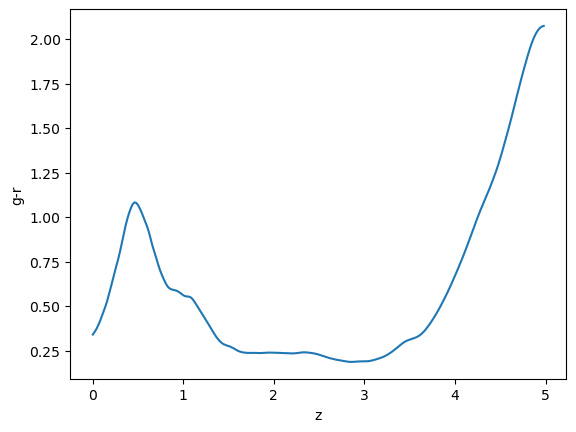

In [14]:
plt.plot(redshifts, mags['g']-mags['r'])
plt.xlabel('z')
plt.ylabel('g-r')

Text(0, 0.5, 'r-i')

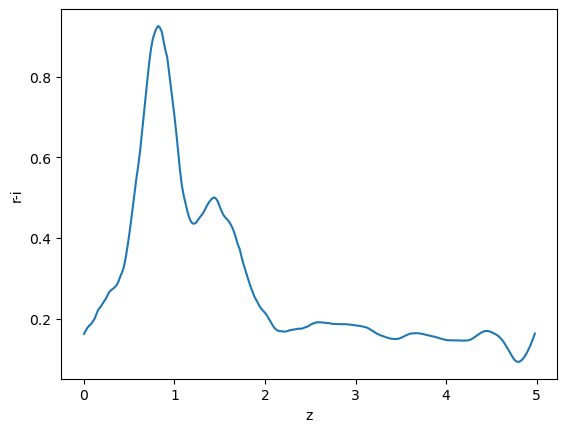

In [15]:
plt.plot(redshifts, mags['r']-mags['i'])
plt.xlabel('z')
plt.ylabel('r-i')

In [16]:
# ok, now given a redshift and 5-sigma depths, find some delta-z

five_sig_depths = {'u': 25.3, 'g': 26.8, 'r': 26.9, 'i': 26.5, 'z': 25.75, 'y': 24.8}

chosen_z = 1.5


In [17]:
indx = np.where(redshifts == chosen_z)[0]

In [18]:
n_gen = 1000
np.random.seed(42)
generated_mags = np.empty(n_gen, dtype=list(zip(names,types)))

for key in generated_mags.dtype.names:
    # 
    snr = 5.0 * 10.0 ** (-0.4 * (mags[key][indx] - five_sig_depths[key]))
    dmag = -2.5*np.log10(1. + 1./snr)
    generated_mags[key] = np.random.randn(n_gen)*dmag + np.max(mags[key][indx])



In [19]:
generated_mags

array([(23.47447011, 23.2635818 , 23.00402698, 22.53316238, 22.27531064, 21.59738765),
       (23.50012814, 23.26757805, 23.00086196, 22.52734415, 22.26802649, 21.59772156),
       (23.46836958, 23.27485974, 23.00472625, 22.52486238, 22.26759572, 21.61283535),
       (23.43299905, 23.2808077 , 23.00183678, 22.51207914, 22.26361697, 21.59633291),
       (23.50400279, 23.269484  , 23.01129412, 22.51947333, 22.27971605, 21.58436421),
       (23.50400213, 23.27204932, 22.99872785, 22.52998322, 22.26256729, 21.60696415),
       (23.43072883, 23.26782589, 22.99999281, 22.51986504, 22.29142206, 21.58080988),
       (23.46353092, 23.27001477, 23.00487338, 22.53115985, 22.27326611, 21.58712357),
       (23.51351157, 23.26652647, 22.99606805, 22.51655074, 22.27202674, 21.60088365),
       (23.47261759, 23.27986738, 22.99440803, 22.52518188, 22.26221056, 21.59420968),
       (23.51326684, 23.26427176, 23.009588  , 22.52308501, 22.26755533, 21.57461857),
       (23.51336026, 23.2736983 , 23.004549

In [20]:
snr

array([95.923186])

In [21]:
five_sig_depths[key]

24.8

In [22]:
np.power(10, 0.4 * (mags[key][indx] - five_sig_depths[key]))

array([0.05212504])

In [23]:
mags[key][indx]

array([21.59261602])

In [24]:
five_sig_depths[key]

24.8

In [25]:
from rubin_sim.maf.utils import m52snr

In [26]:
m52snr(25., 22., gamma=None)

0.3154786722400965

In [27]:
m52snr(25., 22., gamma=0.041)

0.31184766843392375

In [28]:
def mym5(m,m5):
    snr = 5.0 * 10.0 ** (-0.4 * (m - m5))
    return snr